In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-09-30 19:42:07--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.3’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.005s  

2025-09-30 19:42:07 (162 MB/s) - ‘car_fuel_efficiency.csv.3’ saved [874188/874188]



In [49]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [50]:
df =  df[['engine_displacement', 'horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df 

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

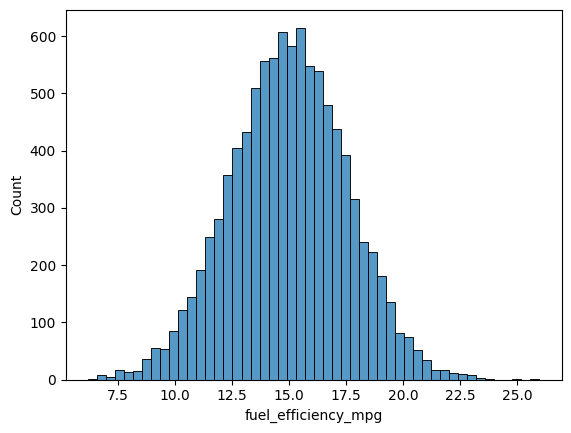

In [6]:
sns.histplot(df.fuel_efficiency_mpg,bins = 50 )

In [7]:
df.isnull().sum()  #q1 horsepower 

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [8]:
df.horsepower.median() #149.0

np.float64(149.0)

In [9]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [10]:
df.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

In [11]:
idx = np.arange(len(df))
np.random.seed(42)
np.random.shuffle(idx)




In [12]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test

In [13]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val =  np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [21]:
base = ['engine_displacement', 'horsepower','vehicle_weight','model_year']                          

In [15]:

y_train = df_train.fuel_efficiency_mpg.values
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [22]:
df_train.fillna(0,inplace = True)


/tmp/ipykernel_9645/3817192555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.fillna(0,inplace = True)


In [23]:
df_train.isnull().sum() 

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [24]:
def train_lr(X,y):
    ones = np.ones(X.shape[0])
    X = (np.column_stack([ones,X]))
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [25]:
X_train = df_train[base].values

In [26]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447], shape=(5824,))

In [28]:
w0,w = train_lr(X_train,y_train)

In [29]:
y_pred = w0+ X_train.dot(w)

<Axes: ylabel='Count'>

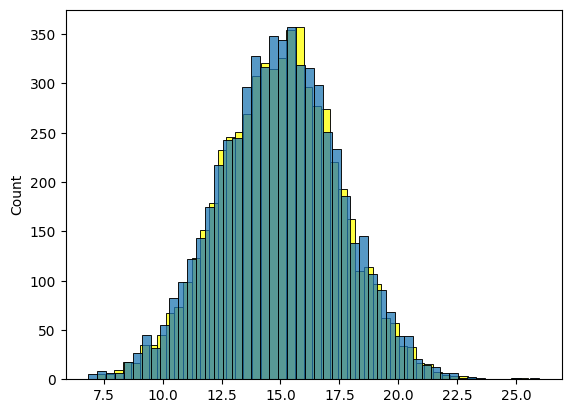

In [30]:
sns.histplot(y_pred, color = "yellow",bins = 50)
sns.histplot(y_train, bins=50)

In [32]:
def rmse(y,y_pred):
    error = y-y_pred
    se = error **2 
    mse = se.mean()
    return np.sqrt(mse)

In [32]:
rmse(y_train,y_pred)

np.float64(0.5202614265099076)

In [33]:
df_train = df.iloc[idx[:n_train]]

In [34]:
df_train.isnull().sum() 

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [35]:
df_train['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

/tmp/ipykernel_9645/161640753.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
/tmp/ipykernel_9645/161640753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


In [36]:
df_train.isnull().sum() 

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [37]:
X_train = df_train[base].values

In [38]:
w0,w = train_lr(X_train,y_train)

In [39]:
y_pred = w0+ X_train.dot(w)

<Axes: ylabel='Count'>

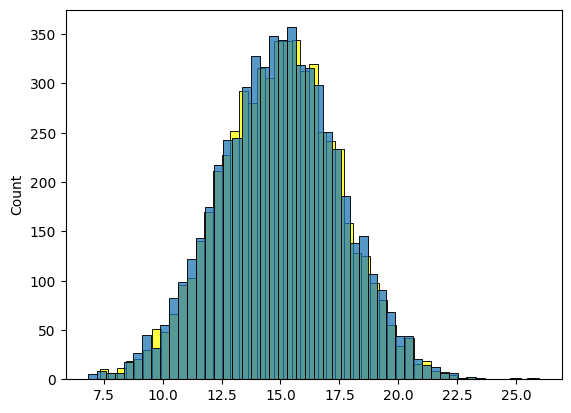

In [40]:
sns.histplot(y_pred, color = "yellow",bins = 50)
sns.histplot(y_train, bins=50)

In [41]:
rmse(y_train,y_pred)

np.float64(0.46243995515359165)

In [43]:
df_train = df.iloc[idx[:n_train]]
df_train.fillna(0,inplace = True)

/tmp/ipykernel_9645/1956413189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.fillna(0,inplace = True)


In [44]:
X_train = df_train[base].values

In [50]:
def train_lr(X,y,r=0.00001):
    ones = np.ones(X.shape[0])
    X = (np.column_stack([ones,X]))
    XTX = X.T.dot(X) #gram matrix
    XTX = XTX + r * np.eye(XTX.shape[0])  # we added the alpha  the
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [53]:
w0,w = train_lr(X_train,y_train)

In [52]:
rmse(y_train,y_pred)

np.float64(0.46243995515359165)

In [54]:
y_pred = w0+ X_train.dot(w)

In [55]:
rmse(y_train,y_pred)

np.float64(0.5202614267244224)

In [62]:
df_val.fillna(0,inplace = True)
for r in [0,0.1,0.001,0.00001,1,10]:
    X_train = df_train.values
    w0,w = train_lr(X_train,y_train, r=r)

    
    X_val = df_val.values
    y_pred = w0 + X_val.dot(w)
    score = rmse (y_val,y_pred)
    print (f'{r}---,---{w0}----,{score}')

0---,---1.8741985741144163e-10----,12.519117517135777
0.1---,---0.000698595500874255----,12.519116238225276
0.001---,---1.7995662501490983e-05----,12.519117504942411
1e-05---,---1.8274704505216732e-07----,12.519117516746242
1---,---0.0010640853922659899----,12.519104333671628
10---,---0.0011168025180292376----,12.518986123848364


/tmp/ipykernel_9645/715807814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.fillna(0,inplace = True)


In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [8]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [42]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df =  df[['engine_displacement', 'horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df.fillna(0,inplace = True)

In [43]:
idx = np.arange(len(df))
np.random.seed(42)
np.random.shuffle(idx)

In [44]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test

In [45]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val =  np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)


In [46]:
def train_lr(X,y,r=0.00001):
    ones = np.ones(X.shape[0])
    X = (np.column_stack([ones,X]))
    XTX = X.T.dot(X) #gram matrix
    XTX = XTX + r * np.eye(XTX.shape[0])  # we added the alpha  the
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [47]:
X_train = df_train[base].values

In [48]:
w0,w= train_lr(X_train,y_train,0.001)

In [49]:
y_pred = w0 + X_train.dot(w)

In [50]:
rmse(y_train,y_pred)

np.float64(0.039086772858531973)

In [52]:
X_val = df_val[base].values


In [53]:
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)


np.float64(0.03997566114754041)

In [55]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = df_train[base].values
    w0,w = train_lr(X_train,y_train, r=r)

    X_val = df_val[base].values
    y_pred = w0 + X_val.dot(w)
    score = rmse (y_val,y_pred)
    print (f'{r}---,---{w0}----,{score}')

0---,---3.6646662472218297----,0.03997925782374439
0.01---,---3.1688134470074534----,0.03997787201684389
0.1---,---1.4288369989383432----,0.04050873984529611
1---,---0.22012861946726972----,0.04135385150821747
5---,---0.04624885656570121----,0.04150611823271757
10---,---0.023271722731248758----,0.041526801237522025
100---,---0.0023413689852701753----,0.04154575656081135


In [86]:
def train_lr(X,y):
    ones = np.ones(X.shape[0])
    X = (np.column_stack([ones,X]))
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]
scores = []
for i in range (10):
    idx = np.arange(len(df))
    np.random.seed(i)
    np.random.shuffle(idx)
    df.fillna(0,inplace = True)
    n = len(df)
    n_val = int(n*0.2)
    n_test = int(n*0.2)
    n_train = n-n_val-n_test
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val =  np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
    w0,w = train_lr(X_train,y_train)
    X_val = df_val[base].values
    y_pred = w0 + X_val.dot(w)
    score = rmse (y_val,y_pred)
    scores.append(score)
    
    
    
   

In [87]:
print(scores)

[np.float64(0.16473938316369863), np.float64(0.16673714109264717), np.float64(0.16593018858749423), np.float64(0.1631614051479773), np.float64(0.16228703421157298), np.float64(0.16058145195072146), np.float64(0.16429900019837804), np.float64(0.16078032152314467), np.float64(0.16689749894533148), np.float64(0.16119029155955564)]


In [88]:
scores = np.array(scores)

In [89]:
scores

array([0.16473938, 0.16673714, 0.16593019, 0.16316141, 0.16228703,
       0.16058145, 0.164299  , 0.16078032, 0.1668975 , 0.16119029])

In [91]:
std =np.std(scores)

In [92]:
std = (round(std, 3))

In [93]:
std

np.float64(0.002)

In [4]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df =  df[['engine_displacement', 'horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df.fillna(0,inplace = True)

In [34]:
idx = np.arange(len(df))
np.random.seed(9)
np.random.shuffle(idx)

In [35]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test

In [36]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val =  np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [37]:
df_vt = pd.concat([df_train,df_val])

In [38]:
df_vt = df_vt.reset_index(drop=True)

In [74]:
df_vt.head()
df_vt = df_vt.fillna(0)
df_test = df_test.fillna(0)


In [75]:
X_vt = df_vt[base].values

In [76]:
y_vt = np.concatenate([y_train,y_val])

In [77]:
y_vt

array([2.42521856, 2.67272928, 2.8443658 , ..., 2.68635934, 2.92279789,
       2.83726248], shape=(7764,))

In [83]:
def train_lr1(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = (np.column_stack([ones,X]))
    XTX = X.T.dot(X) #gram matrix
    XTX = XTX + r * np.eye(XTX.shape[0])  # we added the alpha  the
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [84]:
w0,w = train_lr1(X_vt,y_vt)
df_test = df_test.fillna(0)

In [85]:
X_test = df_test[base].values


In [86]:
y_pred = w0 + X_test.dot(w)
score = rmse (y_test,y_pred)
score

TypeError: 'numpy.float64' object is not callable

0.039196136444546614
